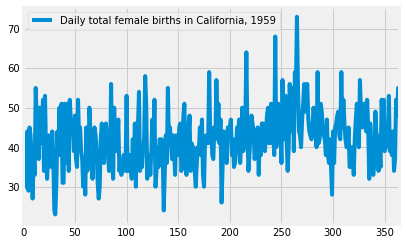

Best MSE = 47.17514578536712
Best RMSE = 6.868416541341033
Optimal n = 47
MA = 43.54609929078014


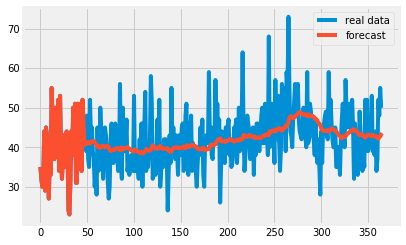

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt

csv_dataset = pd.read_csv("daily_total_female_births_in_cal.csv")
csv_dataset.plot()
plt.show()

optimal_n = None
best_mse = None
db = csv_dataset.iloc[:, :].values.astype('float64')
mean_results_for_all_possible_n_values = np.zeros(int(len(db) / 2 - 2))
for n in range(3, int(len(db) / 2 + 1)):
    mean_for_n = np.zeros(len(db) - n)
    for i in range(0, len(db) - n):
        weight = 1
        divider = 0
        result = 0
        for data in db[:, 0][i:i+n]:
            result += data * weight
            divider += weight
            weight += 1
        obs = result / divider
        mean_for_n[i] = np.power(obs - db[i + n][0], 2)
    mean_results_for_all_possible_n_values[n - 3] = np.mean(mean_for_n)
optimal_n = np.argmin(mean_results_for_all_possible_n_values) + 3
best_mse = np.min(mean_results_for_all_possible_n_values)
print("Best MSE = %s" % best_mse)
best_rmse=sqrt(best_mse)
print("Best RMSE = %s" % best_rmse)
print("Optimal n = %s" % optimal_n)

weight = 1
divider = 0
result = 0
for data in db[:, 0][len(db) - optimal_n: len(db)]:
    result += data * weight
    divider += weight
    weight += 1
next_observation =  result / divider
print("MA = %s" % next_observation)

forecast = np.zeros(len(db) + 1)
for i in range(0, optimal_n):
    forecast[i] = db[i][0]
for i in range(0, len(db) - optimal_n + 1):
        weight = 1
        divider = 0
        result = 0
        for data in db[:, 0][i: i + optimal_n]:
            result += data * weight
            divider += weight
            weight += 1
        forecast[i+optimal_n] = result / divider
plt.plot(db[:, 0],label = 'real data')
plt.plot(forecast, label = 'forecast')
plt.legend()
plt.show()